In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.models import Sequential
import sys 
import warnings
if not sys.warnoptions:
  warnings.simplefilter('ignore')
import numpy as np
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import layers, models
import os
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot.tf_keras import PlotLossesCallback
assert tf.__version__.startswith('2')
from keras.applications import VGG16

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150
test_dir = r'Data\Test'
train_dir = r'Data\test_model'
image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = image_generator.flow_from_directory(
                                        batch_size=BATCH_SIZE,
                                        directory=train_dir,
                                        shuffle=True,
                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                        class_mode='binary')
val_data_gen = image_generator.flow_from_directory(
                                        batch_size=BATCH_SIZE,
                                        directory=test_dir,
                                        shuffle=True,
                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                        class_mode='binary')

In [46]:
image_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_sample_aug = image_gen_aug.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=False,
                                               target_size=(IMG_SHAPE, IMG_SHAPE),
                                               class_mode='binary')

Found 6040 images belonging to 2 classes.


In [5]:
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
vgg_model.trainable = False
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

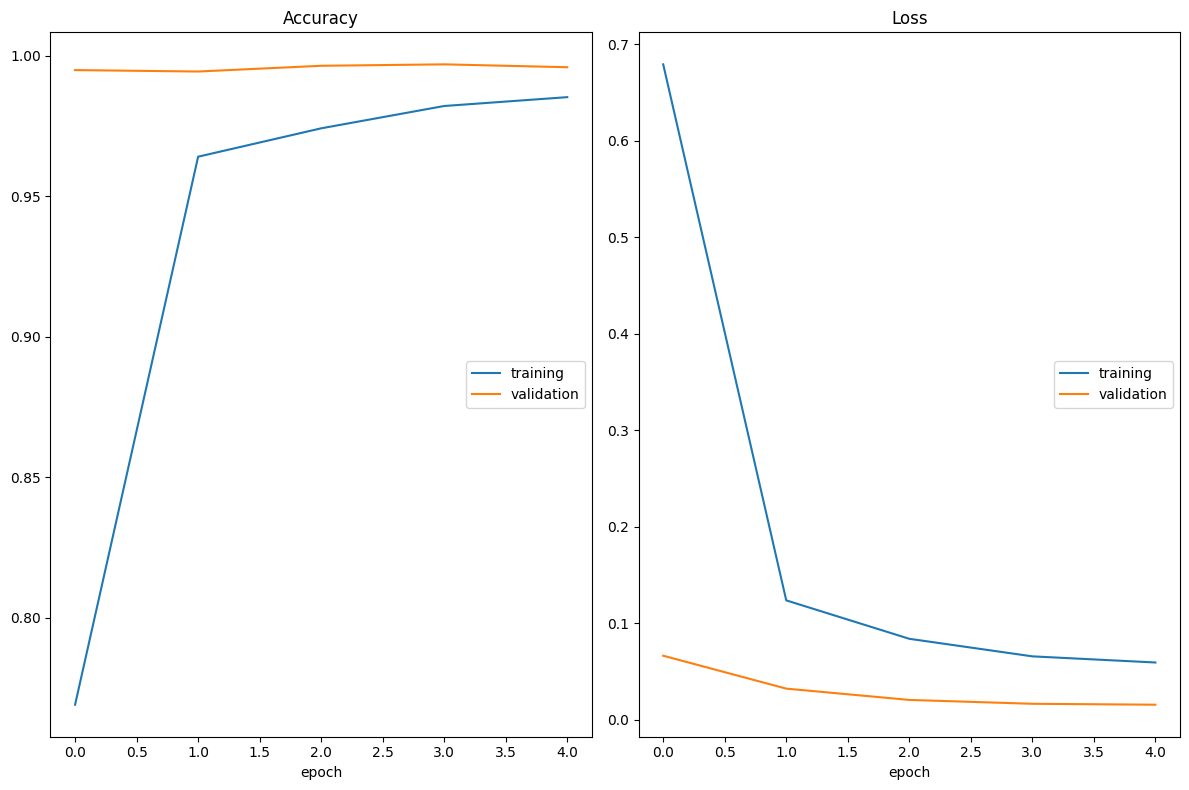

Accuracy
	training         	 (min:    0.769, max:    0.985, cur:    0.985)
	validation       	 (min:    0.994, max:    0.997, cur:    0.996)
Loss
	training         	 (min:    0.059, max:    0.679, cur:    0.059)
	validation       	 (min:    0.015, max:    0.066, cur:    0.015)
61/61 [==============================] - 177s 3s/step - loss: 0.0592 - Accuracy: 0.9853 - val_loss: 0.0155 - val_Accuracy: 0.9959


In [31]:
model_vgg16 = Sequential()
model_vgg16.add(vgg_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(256))
model_vgg16.add(Activation('relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1))
model_vgg16.add(Activation('sigmoid'))
model_vgg16.summary()
model_vgg16.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['Accuracy'])
EPOCHS = 5
history = model_vgg16.fit(
    train_sample_aug,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    callbacks=[PlotLossesCallback()])

In [35]:
model_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_5 (Activation)   (None, 1)                

In [36]:
model_vgg16.save('model_vgg.h5')

In [51]:
predict = model_load.predict(test_data_gen)
predict

137/137 [==============================] - 285s 2s/step


array([[0.96306324],
       [0.99470603],
       [0.99285746],
       ...,
       [0.9932311 ],
       [0.98956877],
       [0.99519765]], dtype=float32)